<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Lectura de datos


In [2]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


### Regresión Lineal



[0.16666667]
-0.4444444444444444
R Squared :  0.7499999999999999
Mean Absolute Error:  0.20987654320987661
Root Mean Squared Error:  0.24845199749997668


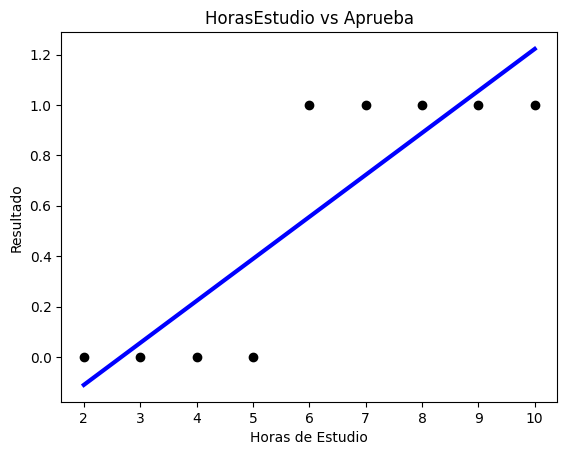

In [6]:
x= df.HorasEstudio.values[:, np.newaxis] # independent variable
y= df.Aprueba                      # dependent variable

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('HorasEstudio vs Aprueba')
plt.ylabel('Resultado')
plt.xlabel('Horas de Estudio')

# add predict value to the data frame
df['Aprueba_Pred'] = lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

# Using built-in function
print ("R Squared : ", r2_score(df.Aprueba, df.Aprueba_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Aprueba, df.Aprueba_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Aprueba, df.Aprueba_Pred)))

### Regresión LOgística



Utilizaremos el modelo con la función  logit o sigmoide:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

In [ ]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

La probabilidad de aprobar es  p = .66 y la de no es  f = 1 - p = .33



In [ ]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['HorasEstudio', 'intercept']

x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))

# plotting fitted line
plt.scatter(df.HorasEstudio, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.HorasEstudio, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Horas de Estudio  vs Aprueba ')
plt.ylabel('Aprueba')
plt.xlabel('Houras Estudio')
plt.show()

In [ ]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

### Plot ROC curve

In [ ]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()